In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plot_subplot(img1, img2, title1, title2, gray = False):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    if gray:
        plt.imshow(img1, 'gray')
    else:
        plt.imshow(img1)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([]);

    plt.subplot(122)
    if gray:
        plt.imshow(img2, 'gray')
    else:
        plt.imshow(img2)
    plt.title(title2)
    plt.xticks([])
    plt.yticks([]);

### Changing Colorspaces

For color conversion, cv2.cvtColot(image, flag) is used, where flag determines the type of conversion.

In [2]:
[i for i in dir(cv2) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

>  For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

##### Object Tracking

In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object

In [3]:
img = cv2.imread('images/tiger.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
hue.shape


(194, 259)

In [4]:
#Change the paramater to zero if you only have one camera
cam = int(input('Which Camera?'))
cap = cv2.VideoCapture(cam)

while(1):
    
    _, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([10, 100, 100])
    upper_red = np.array([179, 255, 255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Which Camera?0


##### How to find HSV values to track

In [22]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Remeber to change HSV ranges. In OpenCV H has values from 0 to 180, S and V from 0 to 255.

In [16]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

### Geometric Transformations of Images

Two important opencv functions for transformations:
- **cv2.warpAffine()**: takes a 2 x 3 transformation matrix
- **cv2.warpPerspective**: takes a 3 x 3 transformation matrix

##### Scaling

Scaling is just resizing of the image. OpenCV  comes with a function cv2.resize(). The size of the image can be specified manually or you can specify the scaling factor. 
Interpolation Methods:

**cv2.INTER_AREA** for shrinking
**cv2.INTER_CUBIC** and **cv2.INTER_AREA** for ZOOMING

Default **cv2.INTER_LINEAR**

In [34]:
res = cv2.resize(img, None, fx = 3, fy = 2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('img',img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
res.shape

(388, 777, 3)

fx and fy are the scaling factor

In [35]:
height, width = img.shape[:2]
res = cv2.resize(img, (3*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Translation

is the shifting of object's location

m = [[1, 0, tx]. [0, 1, ty]] where tx and ty location of x and y after translation

In [41]:
M = np.float32([[1, 0, 10], [0, 1, 50]])
cols, rows = img.shape[:2]
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

> Third Argument of cv2.warpAffine() is the size of the output image, which should be (width, height). 

##### Rotation

In [46]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Affine Transformation

In Affine transformation all parallel lines in the original image will still be parallel in the output image. To find the tranformation matrix, we need three points from input image and their corresponding locations in output image. cv2.getAffineTransform will create a 2 x 3 matrix which is to be passed to cv2.warpAffine()

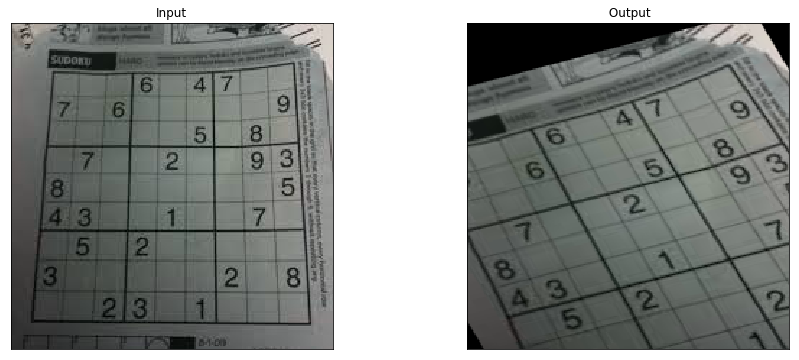

In [3]:
img = cv2.imread('images/sudoku.jpg')
rows, cols, ch = img.shape

pos1 = np.float32([[50, 50], [200, 50], [50, 200]])
pos2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pos1, pos2)

dst = cv2.warpAffine(img, M, (cols, rows))

plot_subplot(img, dst, 'Input', ' Output')

##### Perspective Transformation

For Perspective Transformation you need 3 x 3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the oupur inage. Among these 4, 3 of them should be collinear. Transormation Matrix can be found by cv2.getPerspectiveTransform().

Text(0.5,1,'Output')

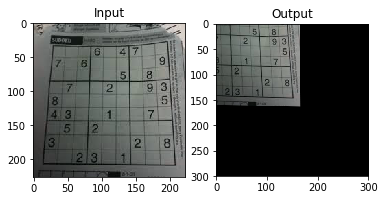

In [56]:
pos1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pos2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pos1, pos2)

dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

### Image Thresholding

##### Simple Thresholding

If pixel value is greater than a theshold value, it is assigned one value else it is assigned another value. **cv2.threshold** is used. The source image must be a **grayscale image**. Threshold value is used to classify the pixels. Third Argument is the maxVal which represents the value to be given if pixel value is more than the threshold value.

Fourth Parameter is a style of thresholding. Different styles are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

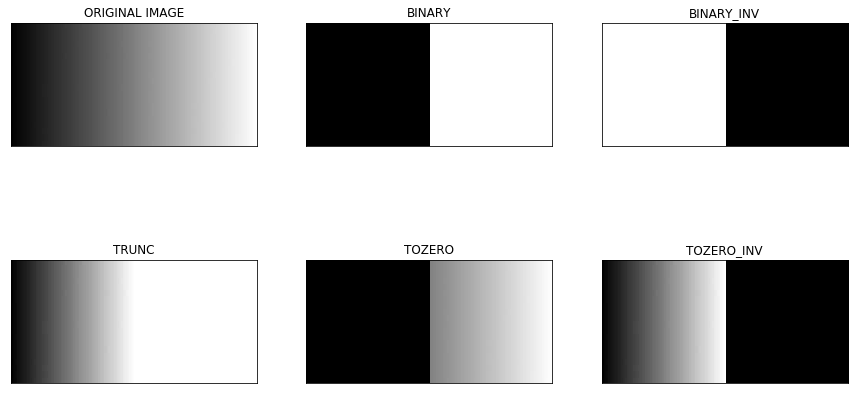

In [14]:
img = cv2.imread('images/gradient.jpg', 0)
plt.figure(figsize=(15, 8))
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['ORIGINAL IMAGE', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

##### Adaptive Thresholding

In simple thresholding we used a global value as a threshold value. In images with different lighting conditions, adaptive thresholding is more appropriate.  The algorithm calculates the threshold for small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

Adaptive Method_ Decides ow thresholding value is calculated.
- cv2.ADPATIVE_THRESH_MEAN_C: thresh value is the mean of neightbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: thresh value is the weighted sum of neightbourhood values where weights are a gaussian window.

Block size: Decides size of neighbourhood are.

C - It is just a constant which is subtracted from the mean or wieghted mean calculated.

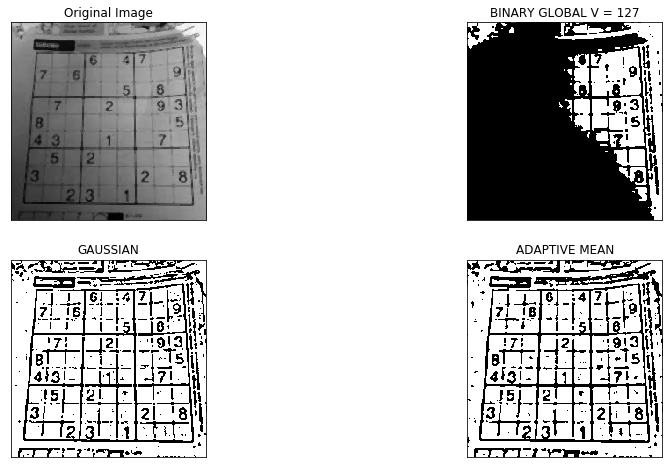

In [22]:
img = cv2.imread('images/sudoku.jpg', 0)
img = cv2.medianBlur(img, 3)

plt.figure(figsize=(15, 8))
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'BINARY GLOBAL V = 127', 'GAUSSIAN', 'ADAPTIVE MEAN']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    

##### Otsu's Binarization

In global thresholding, we used an arbitrary value. How to be sure if the selected value is good? Trial and Error! Bimodal image has an image whose histogram has two peaks. Got bimodals  we can approximately take a value in the middle of those peaks as a threshold. This is Otsu binarization. It automatically calculates a threshold value from image histogram for a bimodal image. (For images that are not bimodal, binarization will not be accurate)

cv2.THRESH_OTSU flag is used in cv2.threshold. For threshold value, simply pass zero. Then the algorithm finds the optimal threshod value and returns the seconds input that is retVal(we've been getting in this value). If otsu is not used, retVal is same as threshold value.

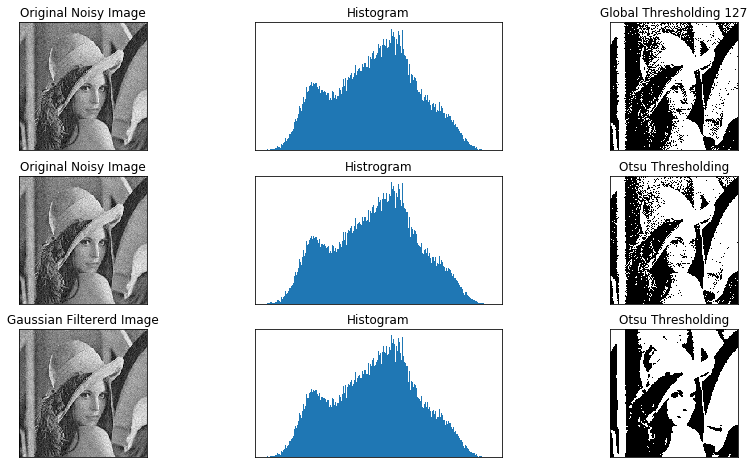

In [29]:
img = cv2.imread('images/woman.jpg', 0)

plt.figure(figsize=(15, 8))
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1,
         img, 0, th2,
         img, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding 127',
         'Original Noisy Image', 'Histrogram', 'Otsu Thresholding',
         'Gaussian Filtererd Image', 'Histogram', 'Otsu Thresholding']

for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2])
    plt.xticks([])
    plt.yticks([])
    

### Smoothing Images

##### 2D Convolution (Image Filtering)

Images can be filtered with various low pass and high pass filters. LPF helps in removing noises. HPF helps in finding edges in the images.

cv2.filter2D() is used to convolve a kernel with an image. 

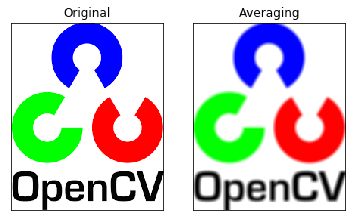

In [8]:
img = cv2.imread('images/opencv_logo.png')

kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Averaging')
plt.xticks([])
plt.yticks([]);

##### Image Blurring

Image blurring is achieved by convolving the image with a low-pass filter kernel. Useful for removing noises. It actually removes high frequency count (eg: noises, edges) from the image. So edges are blurred a little bit in this operation. There are other blurring techniques which don't blur the edges.

###### 1. Averaging

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixe;s under kernel area and replace the central element. **cv2.blur()** or **cv2.boxFilter()** can be used.

>  If you don’t want to use normalized box filter, use cv2.boxFilter(). Pass an argument normalize=False to the function.

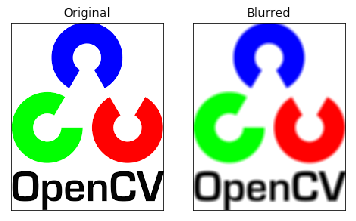

In [11]:
blur = cv2.blur(img, (5,5))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([])
plt.yticks([]);

In [13]:
np.array_equal(cv2.blur(img, (5,5)), cv2.filter2D(img, -1, kernel))

True

In [14]:
np.array_equal(dst, blur)

True

##### 2. Gaussian Blurring

Here Gaussian kernel is used using **cv2.GaussianBlur()**. We should specify the width and height of the kernel which should be positive and odd. We also need ot specify standard deviation in X and Y direction, sigmaX and sigmaY respectively. If both are zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

create gaussian kernel using **cv2.getGaussianKernel()**.


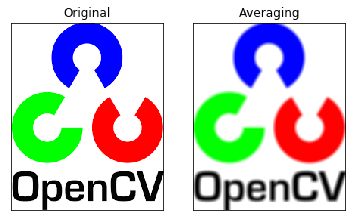

In [15]:
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Gaussian')
plt.xticks([])
plt.yticks([]);

In [16]:
np.array_equal(dst, blur)

False

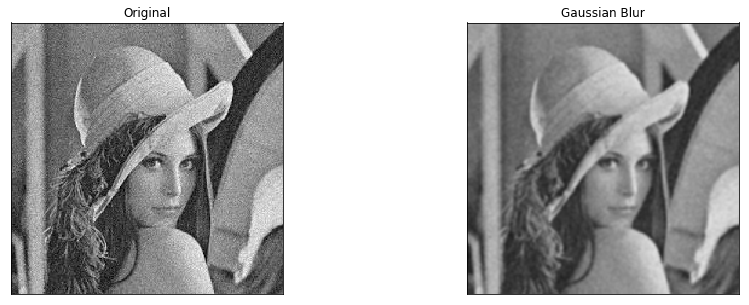

In [29]:
img = cv2.imread('images/woman.jpg')
plt.figure(figsize=(15, 5))
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([]);

##### 3. Median Blur

**cv2.medianBlur())** takes median of all the pixels under the kernel area and central element is replaced with the median value. This is highly effective against salt-and-pepper noise in the images. The central element in median blurring is always replaced by some pixel value in the image. It reduces noise effectively. 

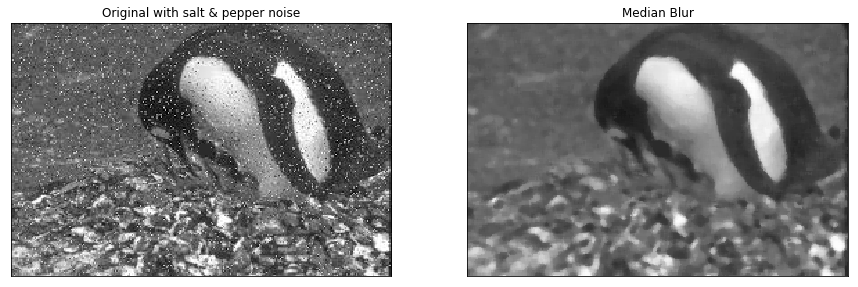

In [19]:
plt.figure(figsize=(15, 5))
img = cv2.imread('images/salt-pepper.jpg')
median = cv2.medianBlur(img, 5)

plt.subplot(121)
plt.imshow(img)
plt.title('Original with salt & pepper noise')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(median)
plt.title('Median Blur')
plt.xticks([])
plt.yticks([]);

##### 4. Bilateral Filtering

**cv2.bilateralFilter()** is highly effective in noise removal while keeping edges sharp. Slower compared to other filters. Gaussian filter takes the neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a functioon of space alonem that is nerby pixels are considred while filtering. It doesn't consider whether pixels have almost same intensity. It doesn;t consider wheter pizel is an edge pixel. So it blurs the edges also.

Bilateral filter also takes a gaussain filter in space, but one more gaussian filter which is a function of pixel difference. Gaus function of space func of intensity differenc makes sure only nearby pixels are considered for blurring. So it preserves the edges.

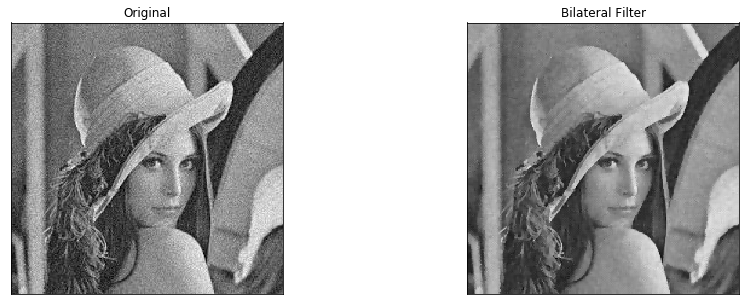

In [28]:
img = cv2.imread('images/woman.jpg')
plt.figure(figsize=(15, 5))
blur = cv2.bilateralFilter(img, 5, 75, 75)
                          
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Bilateral Filter')
plt.xticks([])
plt.yticks([]);

### Morphological Transormations

Morph transformations are some simple operations based on the image shape. Normally performed on binary images. Two input: original image and kernel(structuring element) which decides nature of operation 

##### 1. Erosion

The basic idea of erosion, it erodes away the boundaries of foreground object. The kernel slides through the image. A pixel in the original image will be considered 1 only if all pixels under the kernel are 1. otherwise it is eroded(made 0).

All the pixels newr boundary will be disarded depending upon the size of kernel. So the thickness or size of foreground object decreases or white region decreases in the image. Useful for removing small white noises, detach two connected objects.

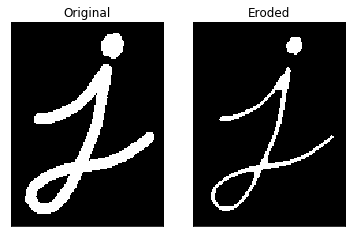

In [39]:
img = cv2.imread('images/j.png')
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

plot_subplot(img, erosion, 'Original', 'Eroded')

##### 2.Dilation

Opposite of erosion. Here, a pixel element is '1', if atleast one pixels under the kernel is '1'. So it increases the white region in the image or size of foreground object.

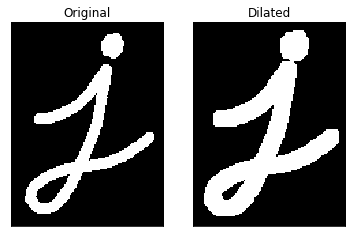

In [38]:
dilation = cv2.dilate(img, kernel, iterations = 1)

plot_subplot(img, dilation, 'Original', 'Dilated')


##### 3. Opening

Opening is erosion followed by dilation. First erosion and then dilation.Useful for removing noise.

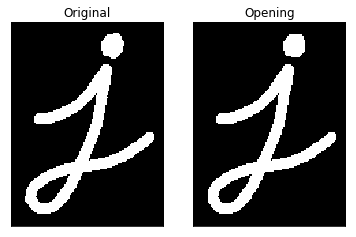

In [40]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plot_subplot(img, opening, 'Original', 'Opening')

##### 4. Closing

Dilation followed by Erosion. Useful for removing small holes inside foreground objects or small black points on the object.

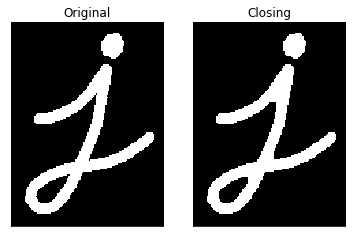

In [41]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plot_subplot(img, closing, 'Original', 'Closing')

##### 5. Morphological Gradient

Difference betweeen erosion and dilation of an image


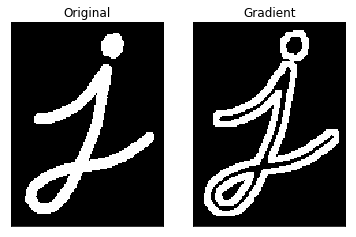

In [43]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plot_subplot(img, gradient, 'Original', 'Gradient')

##### 6. Top Hat

Difference between input image and Opening of the image.

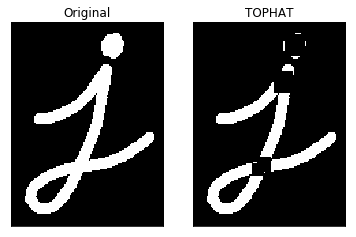

In [44]:

kernel = np.ones((9, 9), np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT,kernel)
plot_subplot(img, tophat, 'Original', 'TOPHAT')

##### 7. Black Hat

Difference between closing of input image and input image.

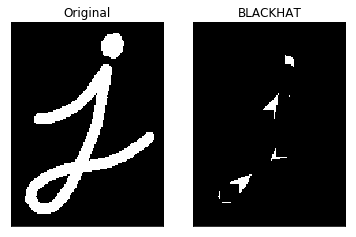

In [45]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plot_subplot(img, blackhat, 'Original', 'BLACKHAT')

##### Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.


In [46]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [47]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [48]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Image Gradients

OpenCV provides three types of gradient filters: High-pass filters, Sobel, Scharr and Laplacian.

##### 1. Sobel and Scharr Derivatives

Sobel operators is a joint aussian smoothing plus differentiation operation, so it is more resisntant to noise. You can specify the direction of derivatives to be taken, vertival or horizontal(yorder or xorder). You can also specify size of the kernel. If -1 then 3x3 Scharr filter is used which gives better results than 3x3 Sobel filer.

##### 2.Laplacian Derivatives

It calculates the Laplacian of the image.

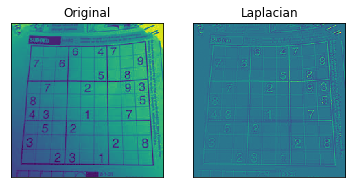

In [60]:
img = cv2.imread('images/sudoku.jpg', 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)#Second arg desired depth of destination image
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

plot_subplot(img, laplacian, 'Original', 'Laplacian')


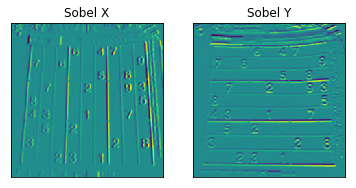

In [61]:
plot_subplot(sobelx,sobely, 'Sobel X', 'Sobel Y')

##### One Important Matter!

In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

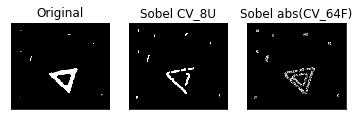

In [62]:
plt.figure(figsize=)
img = cv2.imread('images/binary.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

### Canny Edge Detection

It's a multi stage edge detection algorithm

**1. Noise Reduction**

Since Edge detection is susceptible to noise in the image, we need need to remove noise with a 5x5 Gaussian kernel.

**2. finding Intensity Gradient of the Image**

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction and vertical direction. From these two images we can find edge gradient and direction of each pixel.

Gradient direction is always perpecdicular to edges.

**3. Non-maximum Suppression**







After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixeels, pixels is checked if it is a local maximum in its neighbourhood in the direction of gradient. If the pixel is local max, it is considered for next stage, otherwise it is suppressed.

The result you get is a binary image with 'thin edges'.

#### 4. Hysteresis Thresholding

This stage decides which edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges and are discarded. The edges that whose gradient lies betweem these two thresholds are classified edges or non edges basd on the connectibity. If they are connected to sure-edge pixels, they are considered to be part of edges. Else not. 

MinVal and Maxval should be selected carefully. This stage also removes small pixels noises on the assumption that edges are long lines.


All the above is done by a single function **cv2.Canny()**
- First arg - inpute image
- second arg - minVal
- third arg - maxVal
- fourth arg - aperture size- It is the size of Sobel kernel used for finding image gradients. Default is 3. 
- fifth arg - L2graident which specifies the equation for finding gradient magnitude. default False, If True, uses more accurate equation.

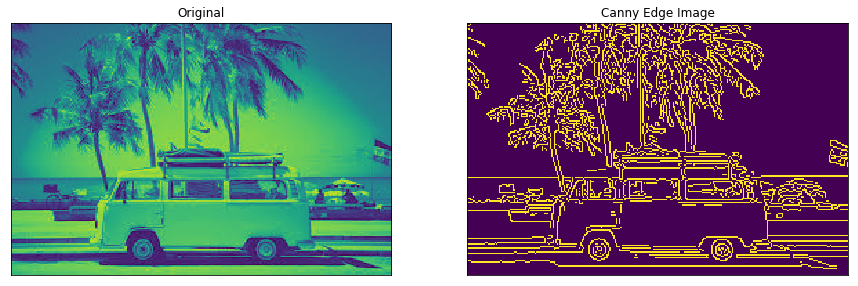

In [18]:
img = cv2.imread('images/scenic.jpg', 0)
edges = cv2.Canny(img, 150, 200)

plot_subplot(img, edges, 'Original', 'Canny Edge Image')


A small application to find the Canny edge detection whose threshold values can be varied using two trackbars

In [26]:
canny_edge = cv2.Canny(img, 50, 151)
def on_trackbar_change(self):
    global canny_edge
    minVal = cv2.getTrackbarPos('minVal', 'image')
    maxVal = cv2.getTrackbarPos('maxVal', 'image')
    canny_edge = cv2.Canny(img, minVal, maxVal)
    
cv2.namedWindow('image')
cv2.createTrackbar('minVal', 'image', 50, 150, on_trackbar_change)
cv2.createTrackbar('maxVal', 'image', 151, 250, on_trackbar_change)

while(1):
    
    cv2.imshow('image', canny_edge)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    
cv2.destroyAllWindows()

### Image Pyramids

In some occasions, we need to work with images of idifferent resolution of the same image. For example, while searching for something in an image, like face, we are not sure at what size the object will be present in the image. Then we need to create a set of Images with different resoltion and search for object in all the images. In that case, we will need to create a set of images with different resolution and search for object in all the images. These set of images with different resolution are called Image Pyramids.

2 Kinds

1. **Gaussian Pyramids** - Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower Level(higher resoltuion) image. Then each pixel in higher level is formed by the contributiion from 5 pixels in underlyinh level with gaussian weights. By doing so, a MxN image becomes M/2xN/2 image. So area reduces to one-fourth of original are. It is called an Octave. The same pattern continues as we go upper in pyramid(resoltion decreases). Similarly while expanding, area becomes4 times in each level. 



In [42]:
img = cv2.imread('images/sudoku.jpg')
lower_reso = cv2.pyrDown(img)
cv2.imshow('image',lower_reso)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

In [41]:
higher_reso = cv2.pyrUp(lower_reso)
cv2.imshow('image',higher_reso)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

> Once you decrease the resolution, you loose the information

2. Laplacian Pyramids - Lap pyramids are formed from the Gaussian Pyramids. There is no exclusive function for that. Laplacian pyramid images are like edge images only. Most of its elements are zeros. They are used in image compression. A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid. 

##### Image Blending using Pyramids

In Image stitching, you need to stack two images together, ut it may not look good due to discontinuities between images. In that case, image blending with pyramids gives you seamless blending without leaving much data in the images. 

1. Load the two images of apple and orange
2. Find the Gaussian Pyramids for apple and orange (in this particular example, number of levels is 6)
3. From Gaussian Pyramids, find their Laplacian Pyramids
4. Now join the left half of apple and right half of orange in each levels of Laplacian Pyramids
5. Finally from this joint image pyramids, reconstruct the original image.

In [63]:
A = cv2.imread('images/apple.jpg')
B = cv2.imread('images/orange.jpg')
B = cv2.resize(B, (224, 224))
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):])) 

cv2.imwrite('output/Pyramid_blending2.jpg',ls_)
cv2.imwrite('output/Direct_blending.jpg',real)

True

### Fourier Transform (Image Transform)

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast Fourier Transform(FFT) is used for calculation of DFT. 

For a sinusoidal signal, **x(t) = Asin(2pift)**, we can say f is the frequency of signal, and if its frequency domain is taken, we can see a spike at f. If signal is sampled to form a discrete signal, we get the same frequency domain, but is periodic in the range [- \pi, \pi] or [0,2\pi] (or [0,N] for N-point DFT). You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image.

More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. You can extend the same idea to images. Where does the amplitude varies drastically in images ? At the edge points, or noises. So we can say, edges and noises are high frequency contents in an image. If there is no much changes in amplitude, it is a low frequency component.

##### Fourier Transform in Numpy

Numpy has an FFT package. **np.fft.fft2()** provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Now once you get the result, **zero frequency component (DC component) will be at top left corner**. If you want to bring it to center, you need to shift the result by N/2 in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

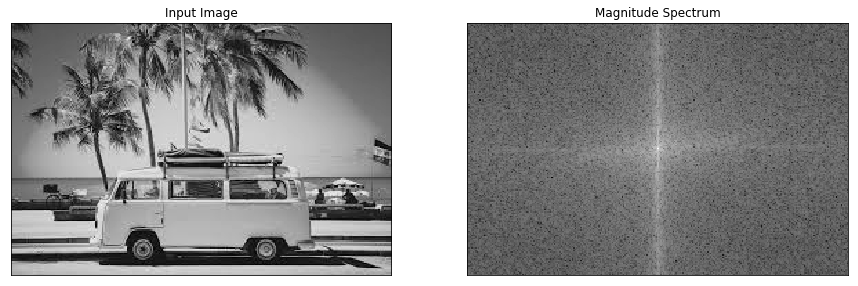

In [37]:
img = cv2.imread('images/scenic.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift)) 

plot_subplot(img, magnitude_spectrum, 'Input Image', 'Magnitude Spectrum', True)

You can see more whiter region at the center showing low frequency content is more.

As we have found the frequency transform we can do few operations in the frequency domain, like high pass filtering and reconstruct the image (find inverse DFT). For this, simply remove the low frequencies by masking with a rectangular window of size 60 x 60. Then apply the inverse shift using **np.fft.ifftshift()**, so that the DC component is again at the top-left corner. Then find inverse FFT using **np.ifft2()** function

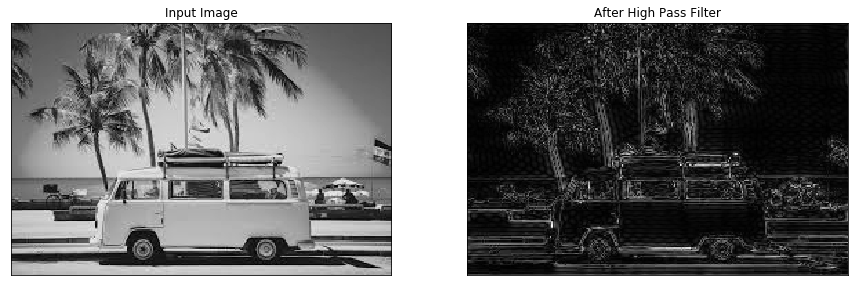

In [15]:
rows, cols = img.shape
c_row, c_col = rows/2, cols/2
fshift[int(c_row) - 30:int(c_row)+30, int(c_col)-30:int(c_col)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_subplot(img, img_back, 'Input Image' , 'After High Pass Filter', True)

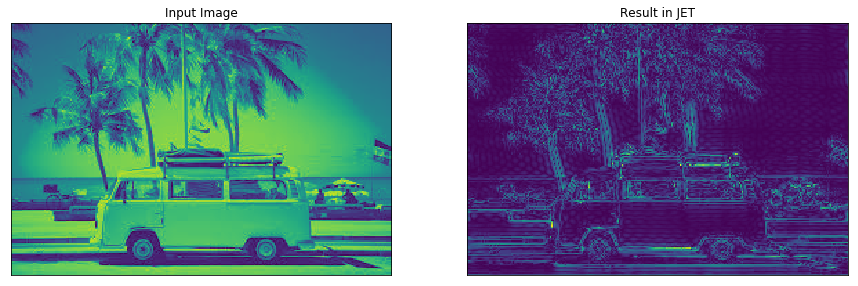

In [16]:
plot_subplot(img, img_back, 'Input Image', 'Result in JET')

This result shows that high pass filtering is an edge detection operation. This also shows that most of the image data is present in the Low Frequency region of the spectrum. 

There are ripple like structures in the JET image, called **ringing effects**. It is caused by rectangular window used for masking. The mask is converted to sinc shape which causes this problem. So the rectangular window is not used for filtering. Better option is Gaussian Windows.

##### Fourier Transform in OpenCV

**cv2.dft()** and **cv2.idft()**. Returns the same results as above but with two channels. First channel will have the real part of thre result and second channel will have the imaginary part of the result. The input image should bt converted to **np.float32**.

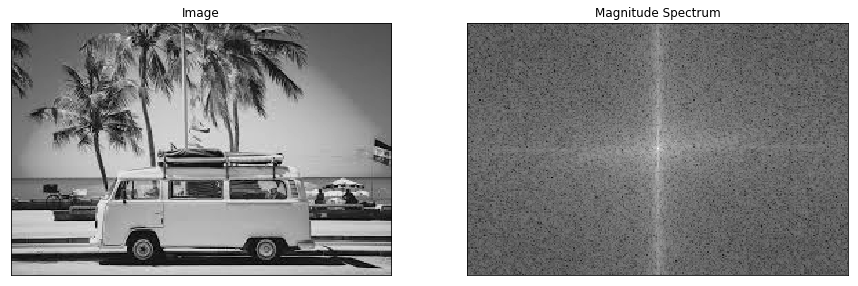

In [17]:
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plot_subplot(img, magnitude_spectrum, 'Image', 'Magnitude Spectrum', True)

> You can use **cv2.cartToPolar** which return both magnitude and phase in a single shot

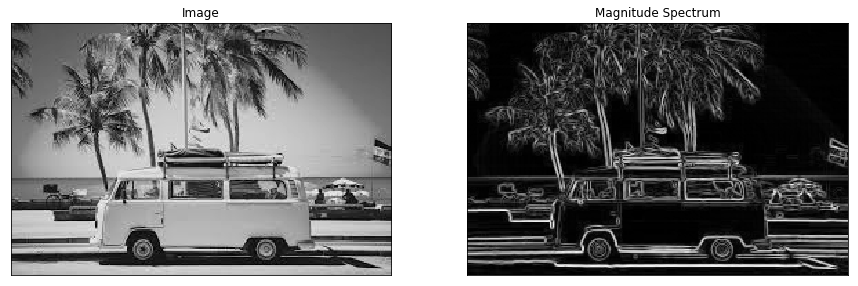

In [21]:
gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0)
gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1)

mag, ang = cv2.cartToPolar(gx, gy)
plot_subplot(img, mag, 'Image', 'Magnitude Spectrum', True)

We now do an inverse DFT. This time we will see how to remove high frequency contents in the image, i.e. Low pass filter. It actually blurs the image. We create a mask first with high value (1) at low frequencies. i.e. we pass the LF content and 0 at HF region.

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


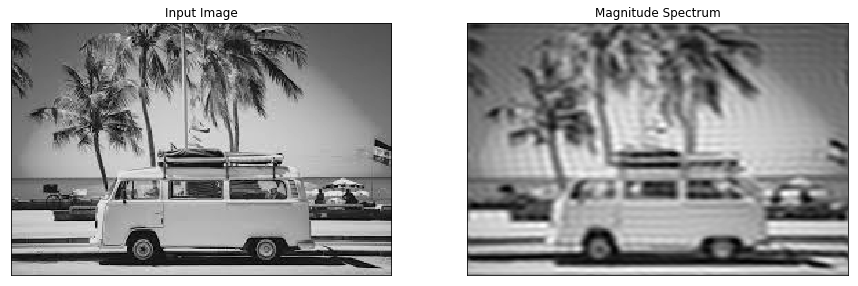

In [39]:
rows, cols = img.shape
c_row, c_col = rows/2, cols/2

mask = np.zeros((rows, cols, 2), np.uint8)
mask[int(c_row) - 30:int(c_row)+30, int(c_col)-30:int(c_col)+30] = 1

fshift = dft_shift * mask
f_ishift = np.fft.ifft(fshift)
img_back = cv2.idft(np.float32(f_ishift))
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plot_subplot(img, img_back, 'Input Image', 'Magnitude Spectrum', True)

> OpenCV functions cv2.dft() and cv2.idft() are faster than Numpy but Numpy functions are more user-friendly.

##### Performance Optomization in DFT

Performance of DFT calculation is better for some array size. It is fastest when array size is power of two. The arrays whose size is a product of 2's, 3's and 5's are also processed quite efficiently. So to improve performance, modify the size of the array to any optimal size(by padding zeros) before finding DFT. For OpenCV, you have to manually pad zeros. But for Numpy, you can specify the new size of FFT Calculation and it will automatically pad zeros.

To find the optimzal size use **cv2.getOptimalDFTSize()**. It is applicable to both cv2.dft() and np.fft.fft2(). 

In [42]:
print(rows, cols)

183 276


In [44]:
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows, ncols)

192 288


So, the size of (183, 276) is modified to (192, 288). Pad this with zeros and find their DFT. Can do this by creating a new bigzero array and copy the data to it or use **cv2.copyMakeBorder()**

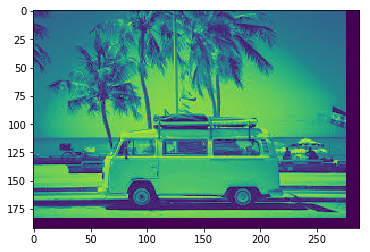

In [48]:
nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img
plt.imshow(nimg)

# OR

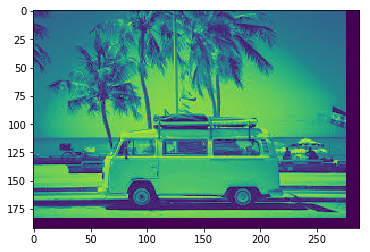

In [47]:
right = ncols - cols
bottom = nrows - rows

bordertype = cv2.BORDER_CONSTANT
nimg = cv2.copyMakeBorder(img, 0 , bottom, 0, right, bordertype, value = 0)
plt.imshow(nimg)

In [49]:
%%timeit
fft1 = np.fft.fft2(img)

2.08 ms ± 74.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit 
fft2 = np.fft.fft2(img, [nrows, ncols])

745 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%%timeit
df1 = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

1.08 ms ± 98.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%%timeit
df1 = cv2.dft(np.float32(nimg), flags = cv2.DFT_COMPLEX_OUTPUT)

484 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


With the optimal size, it is **4 times** faster. OpenCV functions are **3 times** faster than Numpy operations. 

##### Why Laplacian is a High Pass Filter?

Just take the fourier transform of Laplcian for some higher size of FFT

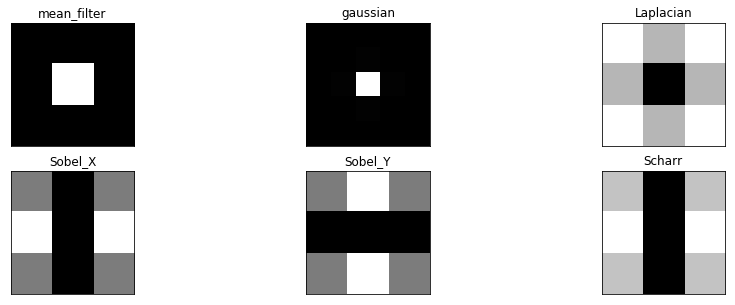

In [62]:
#averaging filter without a scaling parameter
mean_filter = np.ones((3,3))

#creating a gaussian filter
x = cv2.getGaussianKernel(5, 10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])


filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_names = ['mean_filter', 'gaussian', 'Laplacian', 'Sobel_X', 'Sobel_Y',
              'Scharr']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(x) for x in fft_filters]

mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

plt.figure(figsize = (15, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mag_spectrum[i], 'gray')
    plt.title(filter_names[i])
    plt.xticks([])
    plt.yticks([])